In [126]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv(r"car_prices.csv")
print(df)
#culo

        year    make                model         trim       body  \
0       2015     Kia              Sorento           LX        SUV   
1       2015     Kia              Sorento           LX        SUV   
2       2014     BMW             3 Series   328i SULEV      Sedan   
3       2015   Volvo                  S60           T5      Sedan   
4       2014     BMW  6 Series Gran Coupe         650i      Sedan   
...      ...     ...                  ...          ...        ...   
558832  2015     Kia                 K900       Luxury      Sedan   
558833  2012     Ram                 2500  Power Wagon   Crew Cab   
558834  2012     BMW                   X5    xDrive35d        SUV   
558835  2015  Nissan               Altima        2.5 S      sedan   
558836  2014    Ford                F-150          XLT  SuperCrew   

       transmission                vin state  condition  odometer   color  \
0         automatic  5xyktca69fg566472    ca        5.0   16639.0   white   
1         automat

In [127]:
df.shape

(558837, 16)

In [128]:
df.head(5).reset_index().head()

,index,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [129]:
#dropping duplicates,NaN
df_test=df.dropna()
df_test=df_test.drop_duplicates()
df_test=df_test.reset_index()
df_test= df_test.drop('index', axis=1)
print(df_test)


        year    make                model         trim       body  \
0       2015     Kia              Sorento           LX        SUV   
1       2015     Kia              Sorento           LX        SUV   
2       2014     BMW             3 Series   328i SULEV      Sedan   
3       2015   Volvo                  S60           T5      Sedan   
4       2014     BMW  6 Series Gran Coupe         650i      Sedan   
...      ...     ...                  ...          ...        ...   
472320  2011     BMW             5 Series         528i      Sedan   
472321  2012     Ram                 2500  Power Wagon   Crew Cab   
472322  2012     BMW                   X5    xDrive35d        SUV   
472323  2015  Nissan               Altima        2.5 S      sedan   
472324  2014    Ford                F-150          XLT  SuperCrew   

       transmission                vin state  condition  odometer  color  \
0         automatic  5xyktca69fg566472    ca        5.0   16639.0  white   
1         automatic

In [130]:
#check df test
print(df_test)

        year    make                model         trim       body  \
0       2015     Kia              Sorento           LX        SUV   
1       2015     Kia              Sorento           LX        SUV   
2       2014     BMW             3 Series   328i SULEV      Sedan   
3       2015   Volvo                  S60           T5      Sedan   
4       2014     BMW  6 Series Gran Coupe         650i      Sedan   
...      ...     ...                  ...          ...        ...   
472320  2011     BMW             5 Series         528i      Sedan   
472321  2012     Ram                 2500  Power Wagon   Crew Cab   
472322  2012     BMW                   X5    xDrive35d        SUV   
472323  2015  Nissan               Altima        2.5 S      sedan   
472324  2014    Ford                F-150          XLT  SuperCrew   

       transmission                vin state  condition  odometer  color  \
0         automatic  5xyktca69fg566472    ca        5.0   16639.0  white   
1         automatic

In [131]:
#check NaN
for idx,x in enumerate(df_test.columns):
    print(df_test.columns[idx],": ",df_test[x].isna().sum())

year :  0
make :  0
model :  0
trim :  0
body :  0
transmission :  0
vin :  0
state :  0
condition :  0
odometer :  0
color :  0
interior :  0
seller :  0
mmr :  0
sellingprice :  0
saledate :  0


In [132]:
#check unique
for idx,x in enumerate(df_test.columns):
    print(df_test.columns[idx])
    print(df_test[x].unique())

year
[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000 1999 1998 1996 1995 1997 1994 1993 1992 1991 1990]
make
['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Cadillac' 'Acura'
 'Lexus' 'Hyundai' 'Buick' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'Jaguar' 'Volkswagen' 'Toyota'
 'Subaru' 'Scion' 'Porsche' 'Dodge' 'FIAT' 'Chrysler' 'Ferrari' 'Honda'
 'GMC' 'Ram' 'smart' 'Bentley' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'HUMMER' 'Saab' 'Suzuki' 'Oldsmobile' 'Rolls-Royce' 'Isuzu' 'Plymouth'
 'Tesla' 'Aston Martin' 'Geo' 'Fisker' 'Daewoo' 'Lamborghini' 'Lotus']
model
['Sorento' '3 Series' 'S60' '6 Series Gran Coupe' 'Altima' 'M5' 'Cruze'
 'A4' 'Camaro' 'A6' 'Optima' 'Fusion' 'Q5' '6 Series' 'Impala' '5 Series'
 'A3' 'XC70' 'SQ5' 'S5' 'Suburban' 'ELR' 'V60' 'X6' 'ILX' 'K900' 'Malibu'
 'RX 350' 'Versa' 'Elantra' 'Versa Note' 'A8' 'X1' 'Enclave' 'TTS'
 '4 Series' 'MDX' 'Silverado 1500' 'SRX' 'X5' 'G Coupe' 'G 

In [133]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472325 entries, 0 to 472324
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   vin           472325 non-null  object 
 7   state         472325 non-null  object 
 8   condition     472325 non-null  float64
 9   odometer      472325 non-null  float64
 10  color         472325 non-null  object 
 11  interior      472325 non-null  object 
 12  seller        472325 non-null  object 
 13  mmr           472325 non-null  float64
 14  sellingprice  472325 non-null  float64
 15  saledate      472325 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 57.7+ MB


In [134]:
#year classification
orario_now = datetime.datetime.now()
print(orario_now.year)
df_test['year'] = df_test['year'].apply(lambda x : orario_now.year - x)
df_test['year']

2024


0          9
1          9
2         10
3          9
4         10
          ..
472320    13
472321    12
472322    12
472323     9
472324    10
Name: year, Length: 472325, dtype: int64

In [135]:
#condition classification
df_test['condition']=df_test['condition'].astype(float)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472325 entries, 0 to 472324
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   vin           472325 non-null  object 
 7   state         472325 non-null  object 
 8   condition     472325 non-null  float64
 9   odometer      472325 non-null  float64
 10  color         472325 non-null  object 
 11  interior      472325 non-null  object 
 12  seller        472325 non-null  object 
 13  mmr           472325 non-null  float64
 14  sellingprice  472325 non-null  float64
 15  saledate      472325 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 57.7+ MB


In [136]:
#odometer classification
df_test['odometer']=df_test['odometer'].astype(int)

In [78]:
#transmission classification
df_test['transmission']=df_test['transmission'].astype('category').cat.codes
df_test['transmission'].value_counts()

transmission
0    455963
1     16362
Name: count, dtype: int64

In [79]:
#cat.codes on make,model,trim,body,,state,color,interior,seller
df_test['make']=df_test['make'].astype('category').cat.codes
df_test['model']=df_test['model'].astype('category').cat.codes
df_test['trim']=df_test['trim'].astype('category').cat.codes
df_test['body']=df_test['body'].astype('category').cat.codes
df_test['state']=df_test['state'].astype('category').cat.codes
df_test['color']=df_test['color'].astype('category').cat.codes
df_test['interior']=df_test['interior'].astype('category').cat.codes
df_test['seller']=df_test['seller'].astype('category').cat.codes
df_test


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,9,24,637,818,35,0,5xyktca69fg566472,2,5.0,16639,17,1,5943,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,9,24,637,818,35,0,5xyktca69fg561319,2,5.0,9393,17,0,5943,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,10,3,8,253,36,0,wba3c1c51ek116351,2,45.0,1331,7,1,4090,31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,9,51,575,1212,36,0,yv1612tb4f1310987,2,41.0,14282,17,1,11541,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,10,3,33,335,36,0,wba6b2c57ed129731,2,43.0,2641,7,1,4090,66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472320,13,3,25,316,36,0,wbafr1c53bc744672,4,39.0,66403,17,3,6216,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
472321,12,41,6,926,11,0,3c6td5et6cg112407,32,5.0,54393,17,1,5344,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
472322,12,3,722,1489,35,0,5uxzw0c58cl668465,2,48.0,50561,1,1,4090,29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
472323,9,36,63,102,76,0,1n4al3ap0fc216050,5,38.0,16658,17,1,3788,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [80]:
#sellingdate to sellingyear
df_test1=df_test
df_test1['saledate'] = pd.to_datetime(df_test1['saledate'], dayfirst=True,utc=True)
df_test1['saleyear'] = df_test1['saledate'].dt.year 
df_test['saleyear'] = df_test['saleyear'].apply(lambda x : orario_now.year - x)
df_test1=df_test1.drop('saledate',axis=1)
df_test=df_test1
df_test

C:\Users\filip\AppData\Local\Temp\ipykernel_16748\2076306779.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test1['saledate'] = pd.to_datetime(df_test1['saledate'], dayfirst=True,utc=True)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saleyear
0,9,24,637,818,35,0,5xyktca69fg566472,2,5.0,16639,17,1,5943,20500.0,21500.0,10
1,9,24,637,818,35,0,5xyktca69fg561319,2,5.0,9393,17,0,5943,20800.0,21500.0,10
2,10,3,8,253,36,0,wba3c1c51ek116351,2,45.0,1331,7,1,4090,31900.0,30000.0,9
3,9,51,575,1212,36,0,yv1612tb4f1310987,2,41.0,14282,17,1,11541,27500.0,27750.0,9
4,10,3,33,335,36,0,wba6b2c57ed129731,2,43.0,2641,7,1,4090,66000.0,67000.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472320,13,3,25,316,36,0,wbafr1c53bc744672,4,39.0,66403,17,3,6216,20300.0,22800.0,9
472321,12,41,6,926,11,0,3c6td5et6cg112407,32,5.0,54393,17,1,5344,30200.0,30800.0,9
472322,12,3,722,1489,35,0,5uxzw0c58cl668465,2,48.0,50561,1,1,4090,29800.0,34000.0,9
472323,9,36,63,102,76,0,1n4al3ap0fc216050,5,38.0,16658,17,1,3788,15100.0,11100.0,9


In [81]:
#drop vin e check finale
df_test.drop(['vin'], axis = 1, inplace = True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472325 entries, 0 to 472324
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  int8   
 2   model         472325 non-null  int16  
 3   trim          472325 non-null  int16  
 4   body          472325 non-null  int8   
 5   transmission  472325 non-null  int8   
 6   state         472325 non-null  int8   
 7   condition     472325 non-null  float64
 8   odometer      472325 non-null  int32  
 9   color         472325 non-null  int8   
 10  interior      472325 non-null  int8   
 11  seller        472325 non-null  int16  
 12  mmr           472325 non-null  float64
 13  sellingprice  472325 non-null  float64
 14  saleyear      472325 non-null  int64  
dtypes: float64(3), int16(3), int32(1), int64(2), int8(6)
memory usage: 25.2 MB


In [82]:
#correlation table
df_test.corr()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saleyear
year,1.000000,0.007189,0.047803,-0.084940,-0.053411,0.089427,0.000640,-0.334760,0.773102,-0.068534,0.189513,0.000013,-0.588614,-0.578933,0.044558
make,0.007189,1.000000,0.050203,-0.084069,0.040431,0.042780,-0.030968,0.030190,-0.027423,-0.002734,-0.004098,0.166214,-0.061552,-0.059858,0.000411
model,0.047803,0.050203,1.000000,0.121619,-0.011992,0.014383,0.019889,-0.021431,0.062641,0.004437,0.011523,0.041868,-0.003600,-0.003215,-0.005720
trim,-0.084940,-0.084069,0.121619,1.000000,-0.012440,-0.004192,0.057730,0.013273,-0.031639,0.031273,0.005018,-0.042748,0.038224,0.036207,-0.011673
body,-0.053411,0.040431,-0.011992,-0.012440,1.000000,-0.062314,0.005588,0.017083,-0.014299,-0.001298,-0.001426,0.019155,-0.040202,-0.037843,-0.117777
transmission,0.089427,0.042780,0.014383,-0.004192,-0.062314,1.000000,0.016592,-0.020284,0.032234,-0.020775,-0.020557,0.003143,-0.043744,-0.046127,0.004259
state,0.000640,-0.030968,0.019889,0.057730,0.005588,0.016592,1.000000,0.019437,0.016752,0.008664,0.063056,0.012635,-0.018689,-0.022587,-0.027753
condition,-0.334760,0.030190,-0.021431,0.013273,0.017083,-0.020284,0.019437,1.000000,-0.314205,0.040230,-0.068654,-0.000941,0.276521,0.317712,-0.017658
odometer,0.773102,-0.027423,0.062641,-0.031639,-0.014299,0.032234,0.016752,-0.314205,1.000000,-0.036894,0.164867,0.004258,-0.582654,-0.577397,0.026778
color,-0.068534,-0.002734,0.004437,0.031273,-0.001298,-0.020775,0.008664,0.040230,-0.036894,1.000000,0.023421,0.009100,0.011536,0.017580,-0.007413


<Axes: >

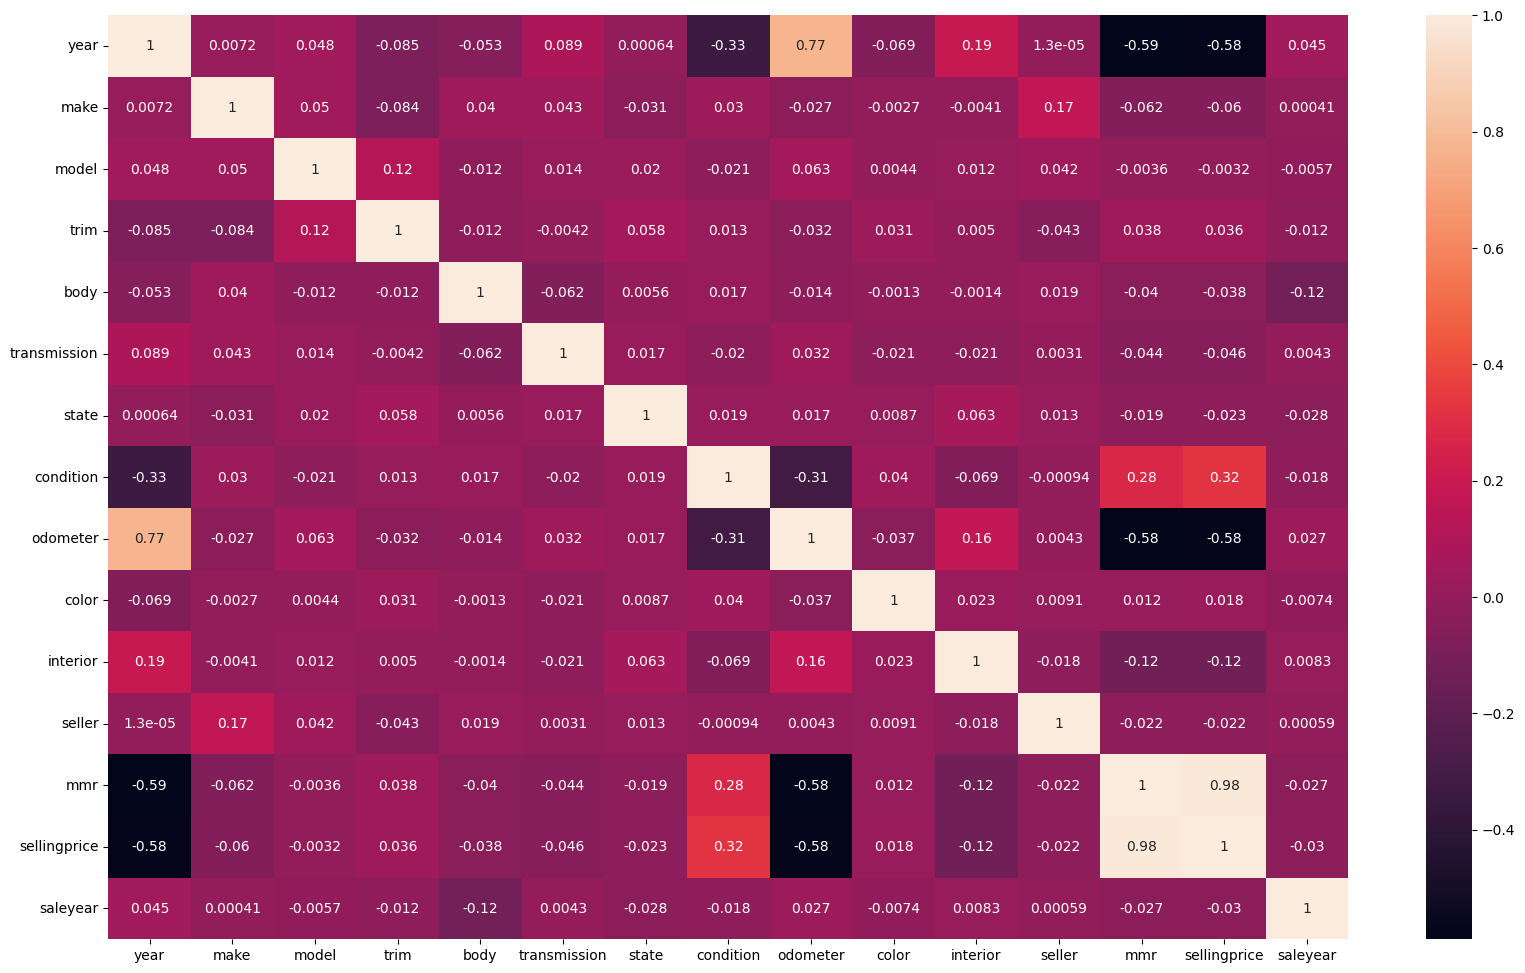

In [83]:
#correlation heatmap
fig, ax = plt.subplots(figsize=(20, 12))

sns.heatmap(df_test.corr(), ax=ax, annot=True)

<Axes: >

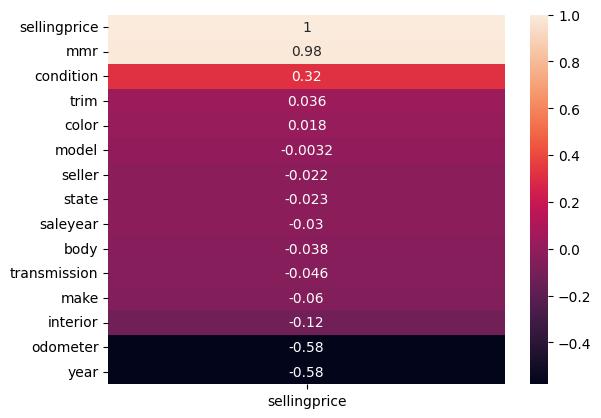

In [84]:
#correlation heatmap solo per la variablile sellingprice in ordine ascendente
sns.heatmap(df_test.corr()[['sellingprice']].sort_values(by='sellingprice', ascending=False), annot=True)

In [85]:
df_test1=df_test
df_test1.drop(['trim'], axis = 1, inplace = True)
df_test1.drop(['color'], axis = 1, inplace = True)
df_test1.drop(['model'], axis = 1, inplace = True)
df_test1.drop(['seller'], axis = 1, inplace = True)
df_test1.drop(['state'], axis = 1, inplace = True)
df_test1.drop(['saleyear'], axis = 1, inplace = True)
df_test1.drop(['body'], axis = 1, inplace = True)
df_test1.drop(['transmission'], axis = 1, inplace = True)
df_test1.drop(['make'], axis = 1, inplace = True)
df_test1.drop(['interior'], axis = 1, inplace = True)


In [86]:
df_test1

,year,condition,odometer,mmr,sellingprice
0,9,5.0,16639,20500.0,21500.0
1,9,5.0,9393,20800.0,21500.0
2,10,45.0,1331,31900.0,30000.0
3,9,41.0,14282,27500.0,27750.0
4,10,43.0,2641,66000.0,67000.0
...,...,...,...,...,...
472320,13,39.0,66403,20300.0,22800.0
472321,12,5.0,54393,30200.0,30800.0
472322,12,48.0,50561,29800.0,34000.0
472323,9,38.0,16658,15100.0,11100.0


In [88]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = df_test1[['year','condition','odometer','mmr']]
y = df_test1['sellingprice']

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

In [140]:
#fitting
model.fit(X_train, y_train)
print(X_train.columns)
model.coef_m   #coeff regr

Index(['year', 'condition', 'odometer', 'mmr'], dtype='object')


array([ 4.16837740e+01,  3.77035118e+01, -1.02233514e-03,  9.83580900e-01])

In [91]:
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)


The r2 is:  0.9694217287968052
The rmse is:  1677.8533274443564


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [30]:
#maker classification
grouped_df = df_test.groupby('make').agg({'sellingprice':['mean']}).reset_index()
print(grouped_df)
print(grouped_df.info())
grouped_df=grouped_df.stack()


             make   sellingprice
                            mean
0           Acura   13104.780147
1    Aston Martin   55500.000000
2            Audi   20010.167638
3             BMW   21290.043863
4         Bentley   72713.333333
5           Buick   10588.182103
6        Cadillac   14733.198892
7       Chevrolet   11866.210434
8        Chrysler   10627.087887
9          Daewoo     450.000000
10          Dodge   10963.794342
11           FIAT    9927.416552
12        Ferrari  128852.941176
13         Fisker   46461.111111
14           Ford   14829.809413
15            GMC   16769.467831
16            Geo     576.562500
17         HUMMER   15404.606771
18          Honda   10942.928453
19        Hyundai   11062.017418
20       Infiniti   20562.796303
21          Isuzu    1774.162011
22         Jaguar   19429.853620
23           Jeep   14755.975736
24            Kia   11767.570824
25    Lamborghini  111500.000000
26     Land Rover   33225.287443
27          Lexus   20284.201652
28        

C:\Users\filip\AppData\Local\Temp\ipykernel_10992\2215267443.py:5: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  grouped_df=grouped_df.stack()


In [38]:
def lst_to_dict(lst,n):
    diz={lst[idx]:n for idx,i in enumerate(lst)}
    return diz
    


In [6]:
#divisione in 4 categorie di make
def cat_make(grouped_df):
    if ((grouped_df['sellingprice'])<=(15000)):
        return 0
    if ((grouped_df['sellingprice'])<=(30000)):
        return 1
    if ((grouped_df['sellingprice'])<=(45000)):
        return 2
    return 3

grouped_df['categ']=grouped_df.apply(cat_make(grouped_df),axis=1)
print(grouped_df)



NameError: name 'grouped_df' is not defined

In [45]:
df1=df_test.loc[(df_test['sellingprice'] < 500)]
print(df1)

        year        make       model     trim         body transmission  \
3625    2005    Chrysler  PT Cruiser  Touring  Convertible    automatic   
3666    2005        Ford    Freestar       SE      Minivan    automatic   
3777    2004     Hyundai      Sonata     Base        Sedan    automatic   
3825    2004    Chrysler  PT Cruiser       GT        Wagon    automatic   
3945    2003        Ford       Focus       SE        Sedan    automatic   
...      ...         ...         ...      ...          ...          ...   
471918  1999        Jeep    Cherokee    Sport          suv    automatic   
471919  1999  Volkswagen      Cabrio      GLS  convertible    automatic   
472072  2002    Chrysler  PT Cruiser     Base        wagon    automatic   
472073  2002       Honda     Odyssey       LX      minivan    automatic   
472114  2000      Saturn    L-Series      LS2        sedan    automatic   

                      vin state  condition  odometer   color interior  \
3625    3c3ey55e15t298363 